In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Enable inline plotting in the notebook
%matplotlib inline

In [3]:
# Read the XLSX file
data_2010 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2009-2010")
data_2011 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2010-2011")

In [4]:
datas = [data_2010, data_2011]
data = pd.concat(datas, keys = ['09-10', '10-11'])
data

Invoice StockCode                          Description  Quantity  \
09-10 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1       489434    79323P                   PINK CHERRY LIGHTS        12   
      2       489434    79323W                  WHITE CHERRY LIGHTS        12   
      3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...              ...       ...                                  ...       ...   
10-11 541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
      541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
      541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
      541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
      541909  581587      POST                              POSTAGE         1   

                     InvoiceDate  Price  Customer ID         Country  
09-10 0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
      1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
      4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                          ...    ...          ...             ...  
10-11 541905 2011-12-09 12:50:00   2.10      12680.0          France  
      541906 2011-12-09 12:50:00   4.15      12680.0          France  
      541907 2011-12-09 12:50:00   4.15      12680.0          France  
      541908 2011-12-09 12:50:00   4.95      12680.0          France  
      541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1041671 entries, ('09-10', 0) to ('10-11', 541909)
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041671 non-null  object        
 1   StockCode    1041671 non-null  object        
 2   Description  1041671 non-null  object        
 3   Quantity     1041671 non-null  int64         
 4   InvoiceDate  1041671 non-null  datetime64[ns]
 5   Price        1041671 non-null  float64       
 6   Customer ID  805549 non-null   float64       
 7   Country      1041671 non-null  object        
 8   Total        1041671 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 96.8+ MB


<AxesSubplot: xlabel='InvoiceDate'>

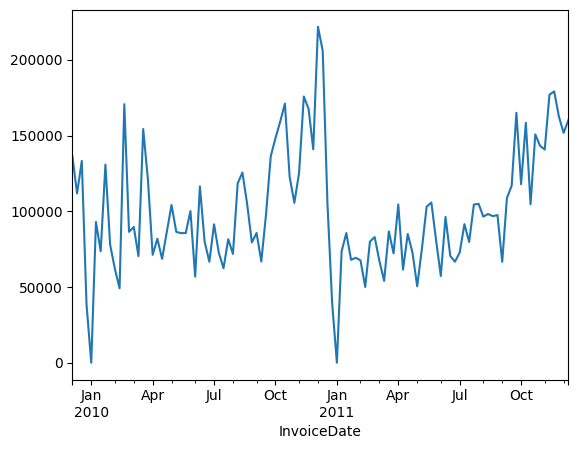

In [5]:
data.reset_index().set_index('InvoiceDate')['Quantity'].resample(rule="W").sum().plot()

In [7]:
data = data[(data.Quantity > 0) & (data.Price > 0)]
data['Total'] = data.Quantity * data.Price
data.head()

Invoice StockCode                          Description  Quantity  \
09-10 0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1  489434    79323P                   PINK CHERRY LIGHTS        12   
      2  489434    79323W                  WHITE CHERRY LIGHTS        12   
      3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

                InvoiceDate  Price  Customer ID         Country  Total  
09-10 0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   83.4  
      1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   81.0  
      2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   81.0  
      3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  100.8  
      4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   30.0

In [8]:
data.Country.value_counts() / data.Country.value_counts().sum()

United Kingdom          0.920158
EIRE                    0.016655
Germany                 0.016026
France                  0.013382
Netherlands             0.004884
Spain                   0.003570
Switzerland             0.003011
Belgium                 0.002945
Portugal                0.002460
Australia               0.001740
Channel Islands         0.001506
Italy                   0.001409
Norway                  0.001379
Sweden                  0.001284
Cyprus                  0.001109
Finland                 0.000991
Austria                 0.000885
Denmark                 0.000766
Unspecified             0.000722
Greece                  0.000631
Poland                  0.000492
Japan                   0.000466
United Arab Emirates    0.000448
USA                     0.000393
Israel                  0.000354
Hong Kong               0.000344
Singapore               0.000325
Malta                   0.000271
Iceland                 0.000243
Canada                  0.000219
Lithuania 